<a href="https://colab.research.google.com/github/adnansaki1097/CodeAlpha_IrisFlowerClassification/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flower Classification - CodeAlpha Internship (Task-1)

This notebook loads `Iris.csv` (provided) and trains a Decision Tree classifier. Run all cells in Google Colab or JupyterLab.

In [ ]:
# MD Adnan Saki
# https://www.linkedin.com/in/adnan-saki/
# https://github.com/adnansaki1097

In [10]:
import pandas as pd

url = "https://raw.githubusercontent.com/adnansaki1097/CodeAlpha_IrisFlowerClassification/refs/heads/main/Iris.csv"
df = pd.read_csv(url)

df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

print('Dataset loaded from:', csv_path)
print('\n-- head() --')
display(df.head())
print('\n-- info() --')
display(df.info())


Dataset loaded from: /Iris.csv

-- head() --


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa



-- info() --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


None

In [3]:
# Prepare features and target
# Assuming the CSV has an index column named 'Id' or similar; we select numeric columns appropriately.
# Common Iris.csv has columns: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species
if 'Id' in df.columns:
    X = df.drop(['Id','Species'], axis=1)
else:
    X = df.drop(['Species'], axis=1)
y = df['Species']

print('\nFeatures shape:', X.shape)
print('Target shape:', y.shape)
display(X.head())



Features shape: (150, 4)
Target shape: (150,)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
pred = model.predict(X_test)

acc = accuracy_score(y_test, pred)
print('\nAccuracy:', acc)
print('\nConfusion Matrix:')
cm = confusion_matrix(y_test, pred)
print(cm)

print('\nClassification Report:')
print(classification_report(y_test, pred))



Accuracy: 0.9333333333333333

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



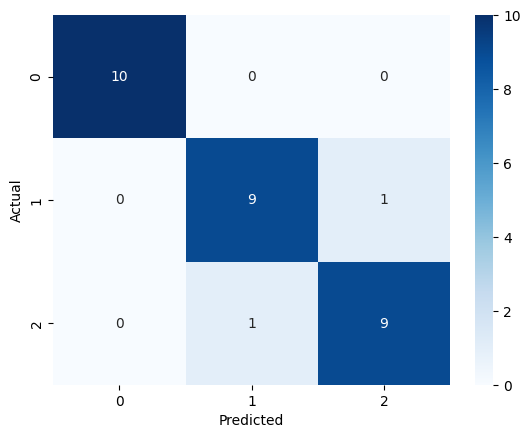

In [5]:
# Simple confusion matrix heatmap
try:
    import seaborn as sns
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
except Exception as e:
    print('Seaborn not available; skipping heatmap. Exception:', e)


In [8]:
# Save sample predictions to CSV (optional)
out_df = X_test.copy()
out_df['True'] = y_test.values
out_df['Predicted'] = pred
out_df.reset_index(drop=True, inplace=True)

out_csv = '/content/iris_predictions_sample.csv'
out_df.to_csv(out_csv, index=False)

print("Sample predictions saved to:", out_csv)



Sample predictions saved to: /content/iris_predictions_sample.csv
